In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.5 anndata==0.9.1 umap==0.5.4 numpy==1.24.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.2 pynndescent==0.5.10


In [10]:
protein = sc.read_csv('./share/GSM5123955_X066-RP0C1W1_leukopak_perm-cells_cite_48M_adt_counts_fixed.csv')

In [11]:
results_file ='pbmc_allen.csv'

In [12]:
protein.var_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


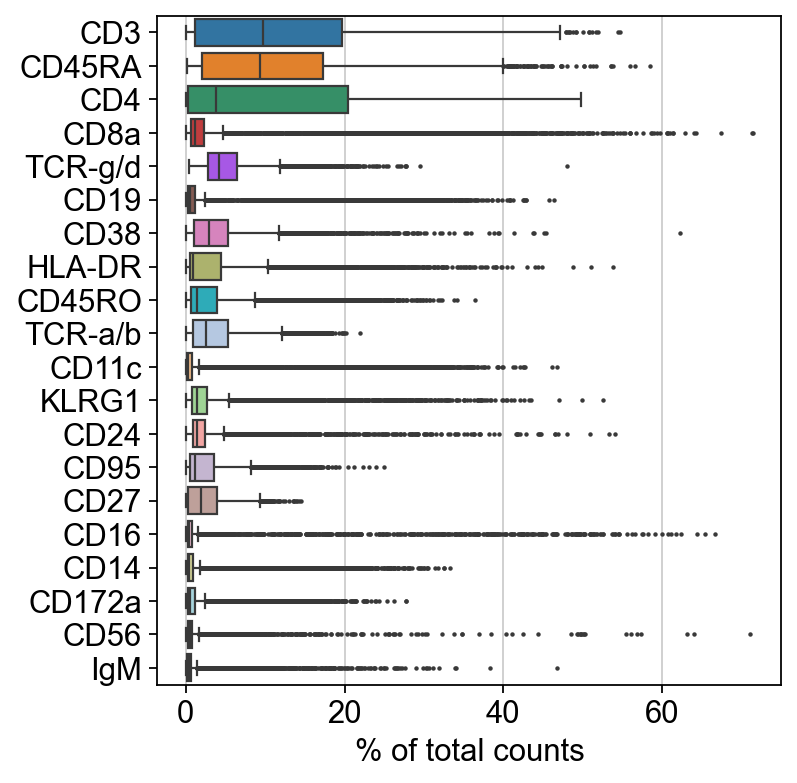

In [13]:
sc.pl.highest_expr_genes(protein, n_top=20, )

In [15]:
#sc.pp.normalize_geometric(protein)
sc.pp.log1p(protein)

In [20]:
sc.pp.pca(protein, n_comps=20)
sc.pp.neighbors(protein, n_neighbors=30)  # why can't we just work with the default neighbors?
sc.tl.leiden(protein, key_added="protein_leiden")

computing PCA
    with n_comps=10
    finished (0:00:00)
computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 16 clusters and added
    'protein_leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [21]:
sc.tl.umap(protein)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


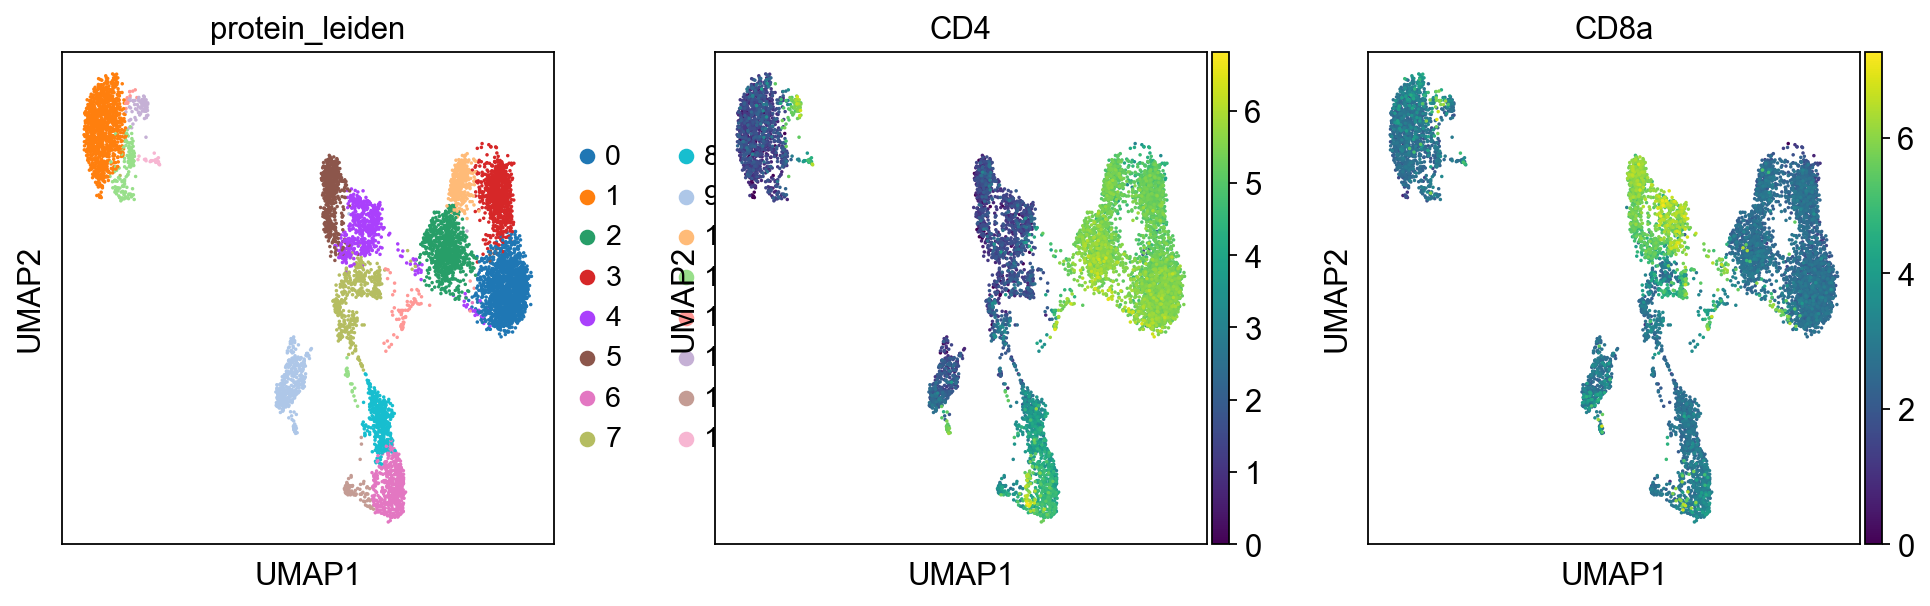

In [24]:
sc.pl.umap(protein, color=["protein_leiden", 'CD4','CD8a'], size=10)